In [1]:
# importing all required pakages and libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import  MinMaxScaler, LabelEncoder
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.svm import  SVC
from sklearn.linear_model import LogisticRegression
import xgboost
from sklearn.ensemble import  RandomForestClassifier
from sklearn.ensemble.gradient_boosting import  GradientBoostingClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')
sb.set()

d:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.gradient_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
ds = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
ds

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


### EDA and Data preprocessing

In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Dataset contains no null values and 35 columns including the target variable 'Attrition'.

In [4]:
ds.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
ds.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

 Here we see the class in 'Attrition' column is quite imbalance with over 5 times the 'NO' over 'Yes' class. We should be carefull while choosing metric in cross-val-score, and probably choose metrics like 'f1_macro' rather then 'accuracy' to properly evaluate the model.
 
 Also, we can infer that null accuracy will be 83.9 %. So, given the problem statement we shall carefully choose our final model.

### EDA and Data preprocessing

In [6]:
# defining function for visualizing probabilities of attrition within different categories.
def attrition_prob_chart(features):
        plt.figure(figsize = (10,5))
        yes = ds[ds['Attrition'] == 'Yes'][features].value_counts()
        no = ds[ds['Attrition'] == 'No'][features].value_counts()
        df = pd.DataFrame([yes,no])
        df.index = ['Attrition Yes','Attrition No']
        df = df.T
        df['prob%'] = (df['Attrition Yes']/(df['Attrition No'] + df['Attrition Yes']))*100
       
        sb.barplot(y = df.index, x = 'prob%', data = df, palette = 'deep')
        plt.xlabel('Probability of Attrition (%)', fontsize = 15)
        plt.xticks(fontsize = 15)
        plt.ylabel('Classes of ' + features, fontsize = 15)
        plt.yticks(fontsize = 15)
        plt.title( "Probability of Attrition 'Yes' in "  + features, fontsize = 16)
        plt.show()

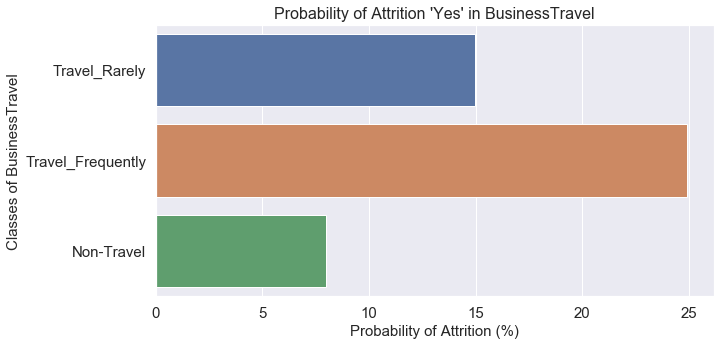

In [7]:
attrition_prob_chart('BusinessTravel')

Here, from above graph, it is quite obvious that employees who tend to travel has higher attrition 'Yes', as compared to non-travellers, as by travelling employees may tend to find new opportunities or deals that may lead to attrition.

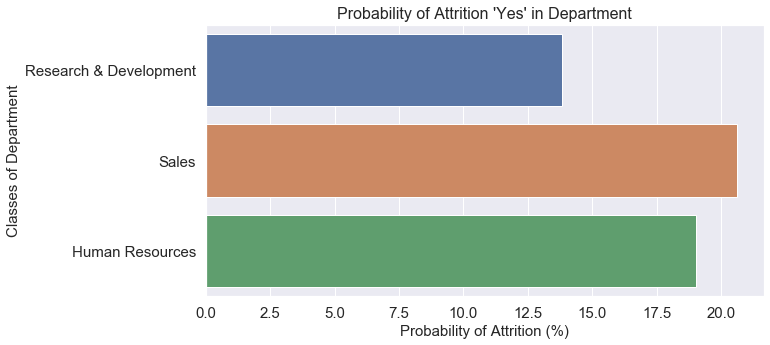

In [8]:
attrition_prob_chart('Department')

Here, sales department attrition probability is highest, followed by human resources and then research & development.

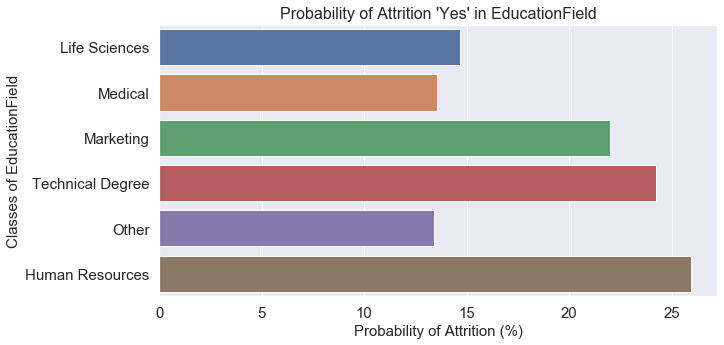

In [9]:
attrition_prob_chart('EducationField')

Here, again education field in human resources attrition probability is highest. Also, marketing and technical degree is not far behind the human resources interms of attrition. 

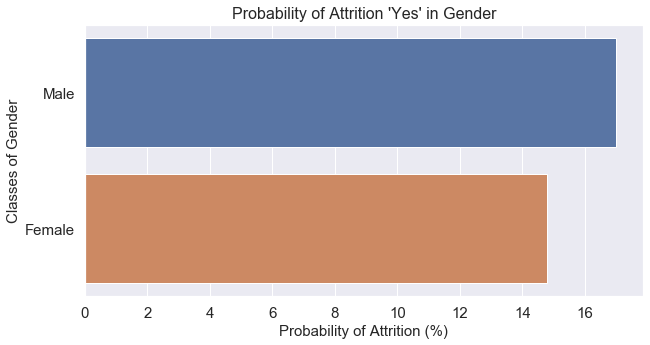

In [10]:
attrition_prob_chart('Gender')

Here, male employees tend to leave the organization more then that of female, or the attrition probaility is higer in male employees. 

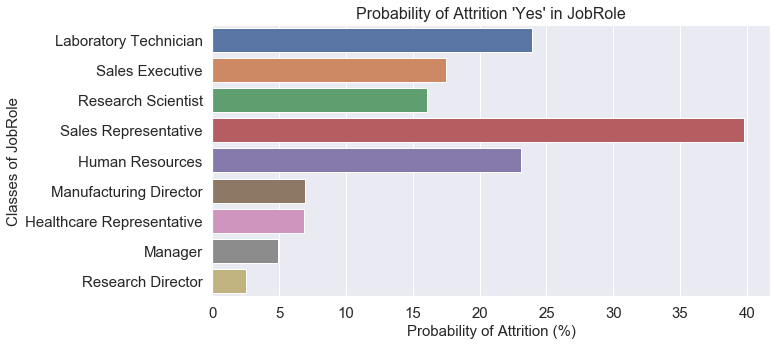

In [11]:
attrition_prob_chart('JobRole')

Here, again sales representative jobroles has the highest attrition by quite a large margin with respect to other jobroles. This is  also evident from the fact that, sales department also had the highest attrition.

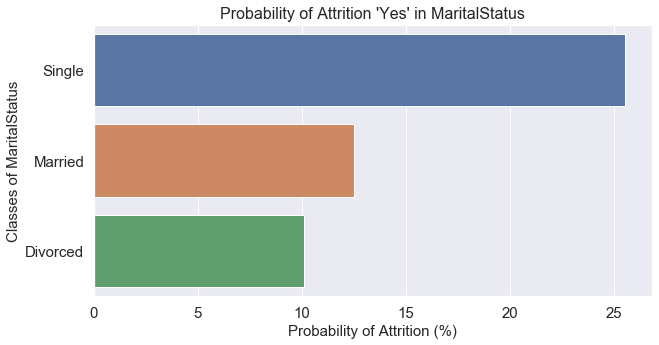

In [12]:
attrition_prob_chart('MaritalStatus')             

Here, married and divorced categories in MaritalStatus, tend to probably stay more then the single employees, this is may be due to the urgent requirement of jobs due to involement of family in married and divorced categories. 

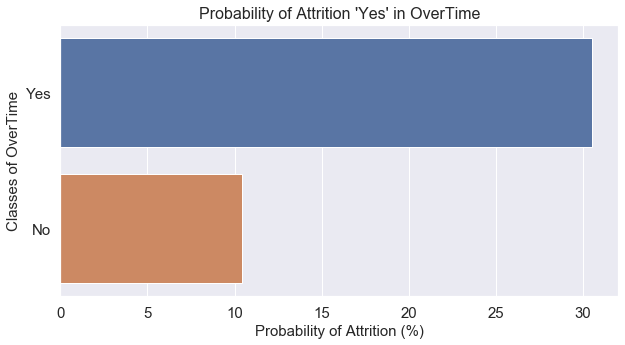

In [13]:
attrition_prob_chart('OverTime')             

Here, employees doing overtime tend to quite more often by large margin then those who dont do overtime.  

In [14]:
# finding columns with constant data points.
for col in ds.columns:
    if  ds[col].value_counts().count() == 1:
        print(col)
   

EmployeeCount
Over18
StandardHours


In [15]:
ds.drop(['StandardHours','EmployeeCount', 'Over18'],1, inplace = True)

Here, we see that columns 'StandardHours', 'Over18' and 'EmployeeCount' have only one unique value, which is not usefull for modelling, so we drop it.

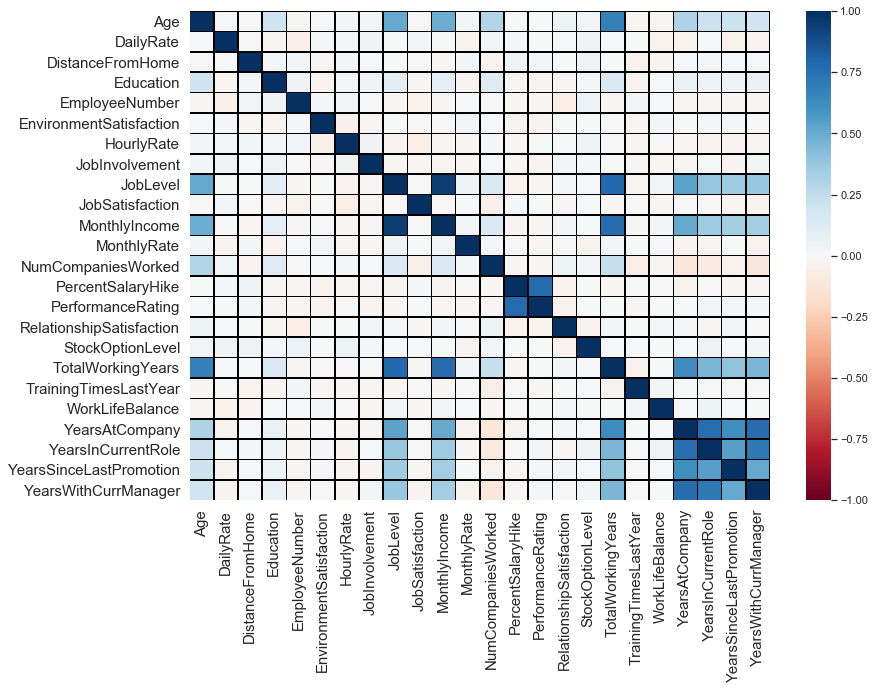

In [16]:
plt.figure(figsize = (13,9))
sb.heatmap(ds.select_dtypes(include='int64').corr(), cmap = 'RdBu', vmin = -1, vmax = 1, center = 0, 
           linewidth = .5, linecolor = 'black')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

From above correlation heatmap, some of the relations are quite obivous, like montly income and joblevel increases with the total working years, and percent-salary hikes increases with performance ratings of the employees.

Also, features like 'years in current role', 'years at company', 'years since last Promotion' and 'years with current manager' are somewhat correlated to each other.

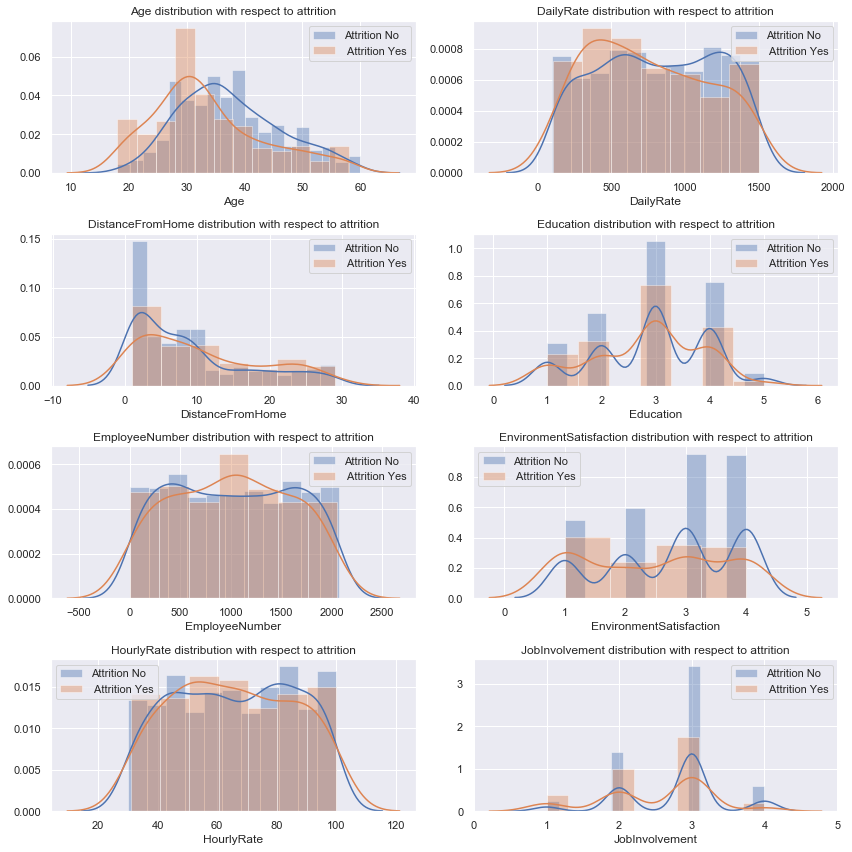

In [17]:
for i, col in enumerate(ds[list(ds.select_dtypes(include='int64'))].columns[:8]):
    plt.subplot(4,2, i+1)
    
    sb.distplot(ds[col][ds['Attrition'] == 'No'])
    sb.distplot(ds[col][ds['Attrition'] == 'Yes'])
  
    plt.legend(['Attrition No',' Attrition Yes'])
    
    plt.title(col+' distribution with respect to attrition')
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(12,12)
    plt.tight_layout()
plt.show()

1. From above plots,we see that younger employees try to quite or leave jobs more often.


2. Also, from 'distance from home plot' we see employees whose work places are nearby their home tend to stay in their jobs more often.


3. We see from 'environment satisfaction plot' that employees who are more satisfied with their environment of work tend to stay in their jobs more often.


4. Also, employees who are more involved in their jobs tend to stay  more often. 

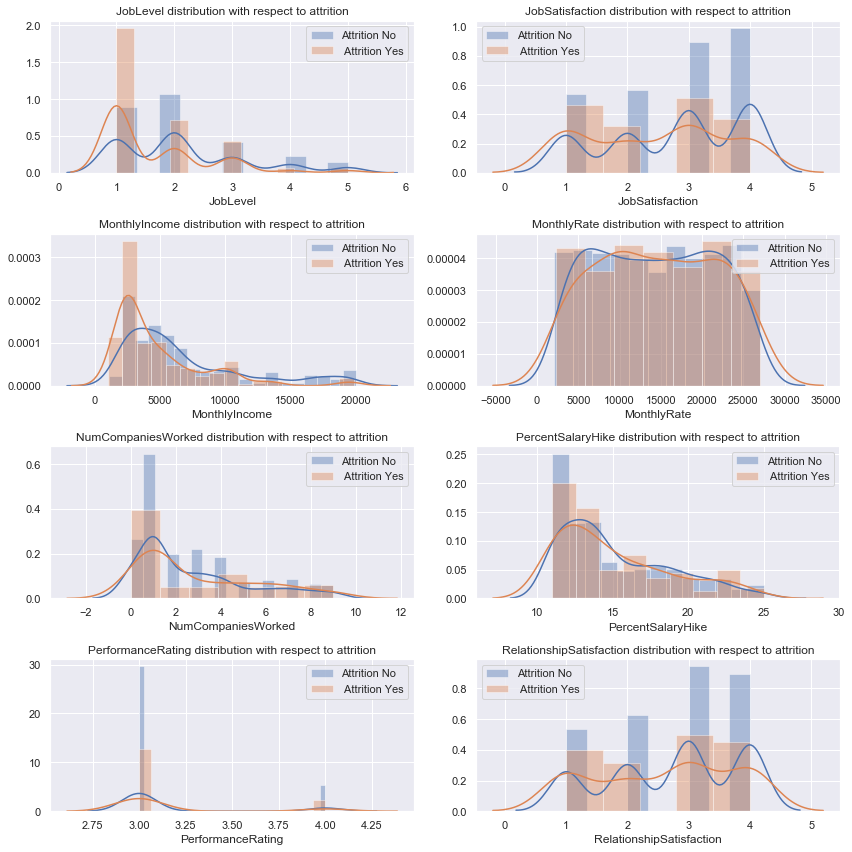

In [584]:
for i, col in enumerate(ds[list(ds.select_dtypes(include='int64'))].columns[8:16]):
    plt.subplot(4,2, i+1)
  
    sb.distplot(ds[col][ds['Attrition'] == 'No'])
    sb.distplot(ds[col][ds['Attrition'] == 'Yes'])
  
    plt.legend(['Attrition No',' Attrition Yes'])
    
    plt.title(col+' distribution with respect to attrition')
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(12,12)
    plt.tight_layout()
plt.show()

1. From above distplot plot we see that employees with initial stages of job level tend to leave their jobs more often. 


2. Job satisfaction plays an important role in keeping employees to stay in the organization.


3. Employees with lowest range of montly income tend to leave the organization more often.


4. Employees who have worked for less number of different companies tend to stay in their jobs.


5. Employees having more relationship satisfaction tend to stay more often in the company.

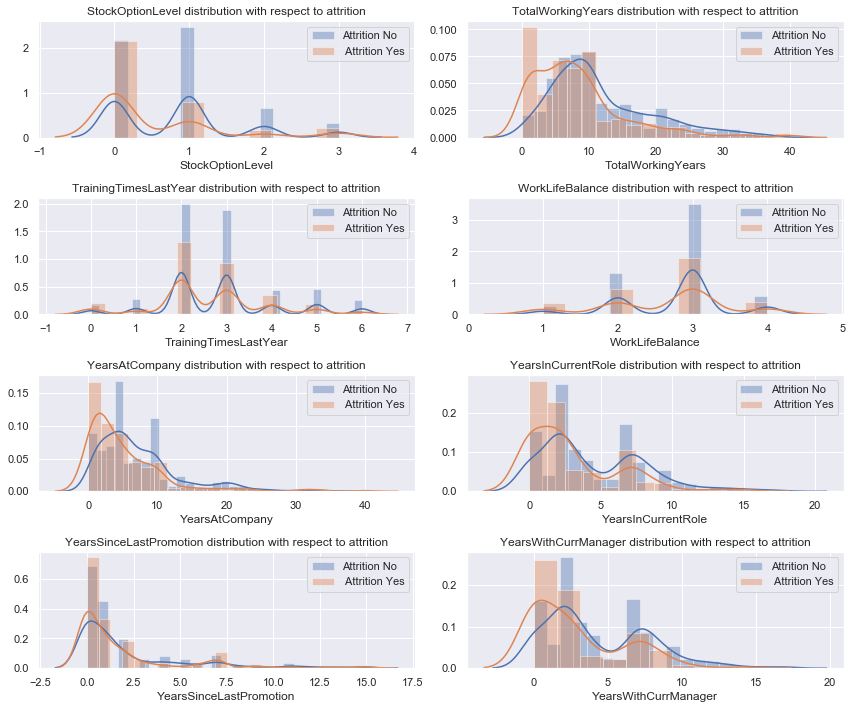

In [585]:
for i, col in enumerate(ds[list(ds.select_dtypes(include='int64'))].columns[16:]):
    plt.subplot(5,2, i+1)
    
     
    sb.distplot(ds[col][ds['Attrition'] == 'No'])
    sb.distplot(ds[col][ds['Attrition'] == 'Yes'])
  
    plt.legend(['Attrition No',' Attrition Yes'])
    
    plt.title(col+' distribution with respect to attrition')
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(12,12)
    plt.tight_layout()
plt.show()

1. We see, stockoption level of 1 and 2 considerably helped employees to stay.


2. Work life balance plays an important role in keeping employees to stay in the company.


3. We can also see that, employees  who have worked longer time in the company tend to stay more often. 

In [18]:
# min-max scaling all numeric columns.
for col in ds.select_dtypes(include = 'int64').columns:
    ds[col] = MinMaxScaler().fit_transform(ds[col].values.reshape(-1,1))

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24]),
 <a list of 24 Text xticklabel objects>)

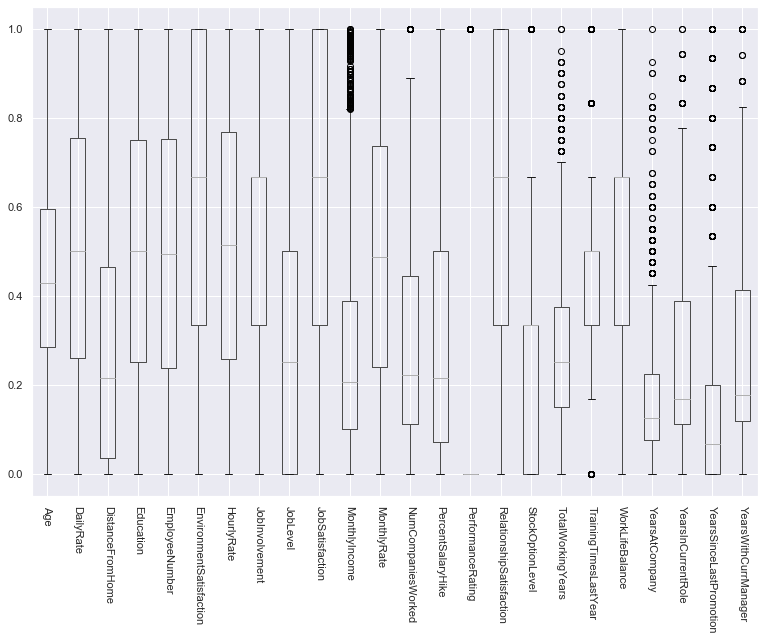

In [19]:
ds.boxplot(column = list(ds.select_dtypes(include = 'float64').columns) ,
                                               figsize = (13,9))
plt.xticks(rotation = -90)

Here for numeric data, we see lot of skewed data and many outliers, to which we shall cube-root transform for skewness and use zcore method for outliers. 

In [20]:
# cube-root transforming skewed numeric columns.
for col in ds.select_dtypes(include = 'float64').columns:
    if abs( ds[col].skew()) > 0.55:
        ds[col] = (ds[col])**(1/3)

In [21]:
z = abs(zscore(ds.select_dtypes(include = 'float64')))

In [22]:
# here we are using z threshold as 3 to filter out outliers.
ds_new = ds[(z<3).all(axis =1)]

In [23]:
print('no. of outliers removed:',ds.shape[0] - ds_new.shape[0])

no. of outliers removed: 141


In [24]:
# oultier-free data set
x = ds_new.drop('Attrition',1)
y = ds_new['Attrition']

In [25]:
# mapping attrition column to its numeric class.
y = y.map({'Yes':1,'No':0})

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, stratify = y,
                                                test_size = 0.2, random_state = 42) 

In [42]:
# label encoding categorical values that has dtype as 'object'.
for col in x_train.select_dtypes(include = 'object').columns:
    encoder = LabelEncoder()
    x_train[col] = encoder.fit_transform( x_train[col])
    x_test[col] = encoder.transform(x_test[col])

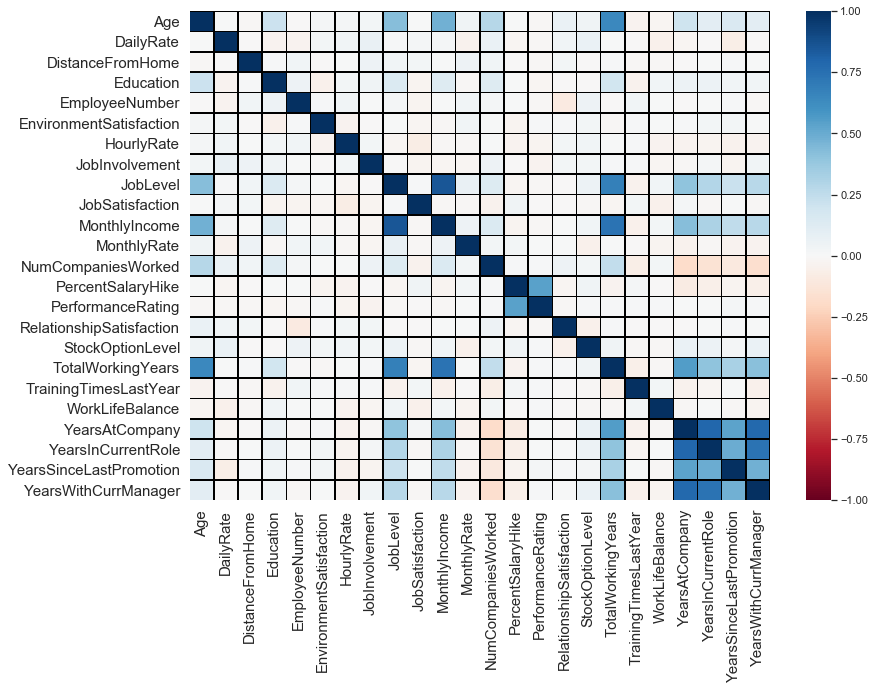

In [43]:
plt.figure(figsize = (13,9))
sb.heatmap(x_train.select_dtypes(include=['int64','float64']).corr(), cmap = 'RdBu', vmin = -1, vmax = 1, center = 0, 
           linewidth = .5, linecolor = 'black')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

Here, we see some correlated features, so we shall manually remove some features like 'JobLevel', 'YearsAtCompany', 'TotalWorkingYears' and 'YearsInCurrentRole', as we will be testing algorithms like LogisticRegression that can be sensitive to Multicollinearity.

In [44]:
# removing highly correlated features.
x_train = x_train.drop(['JobLevel','YearsAtCompany', 'TotalWorkingYears','YearsInCurrentRole'], 1)
x_test = x_test.drop(['JobLevel','YearsAtCompany', 'TotalWorkingYears','YearsInCurrentRole'], 1)

In [45]:
k = StratifiedKFold(n_splits= 10)

In [46]:
x_train

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,YearsWithCurrManager
1438,0.119048,1,0.383679,2,0.658634,0.50,2,0.978229,1.000000,1,...,0.480750,0,0.829827,0.0,0.000000,0.693361,0.793701,0.693361,0.405480,0.000000
1218,0.547619,2,0.584109,2,0.563124,0.50,2,0.825835,1.000000,1,...,0.480750,0,0.414913,0.0,0.333333,0.000000,0.793701,0.873580,0.810960,0.743960
1220,0.428571,2,0.306371,2,0.329317,0.75,1,0.826802,0.666667,0,...,0.693361,0,0.658634,0.0,0.666667,0.000000,0.693361,0.693361,0.736806,0.743960
420,0.261905,2,0.632785,1,0.414913,0.75,3,0.272375,0.333333,1,...,0.480750,0,0.793701,0.0,0.666667,0.000000,0.693361,0.873580,0.000000,0.743960
1011,0.428571,2,0.767359,2,0.414913,0.75,2,0.688921,0.000000,0,...,0.693361,1,0.709492,0.0,1.000000,0.000000,0.793701,0.873580,0.000000,0.388911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,0.309524,2,0.808876,1,0.598408,0.75,3,0.223029,0.666667,0,...,0.480750,1,0.598408,0.0,0.666667,0.000000,0.693361,0.693361,0.643660,0.837884
1191,0.309524,2,0.722978,2,0.522758,0.75,1,0.808902,0.000000,0,...,0.480750,0,0.000000,0.0,0.000000,0.873580,0.693361,0.873580,0.000000,0.489997
930,0.785714,1,0.619900,1,0.563124,0.25,3,0.626996,0.333333,0,...,0.000000,0,0.598408,0.0,0.333333,0.000000,1.000000,0.693361,0.775656,0.743960
405,0.166667,2,0.419470,1,0.414913,0.50,3,0.259797,0.000000,1,...,0.822071,0,0.522758,0.0,0.666667,0.693361,0.941036,0.873580,0.000000,0.489997


### Base-model Evaluation

model: RandomForestClassifier()
CV score:0.5868001993262171
score_std: 0.06507484425469454
----------
model: LogisticRegression()
CV score:0.6635376343203004
score_std: 0.08491257701770284
----------
model: SVC()
CV score:0.46067998957774153
score_std: 0.0012570838386000071
----------
model: AdaBoostClassifier()
CV score:0.6852657105863865
score_std: 0.0908120391570525
----------
model: GradientBoostingClassifier()
CV score:0.6519985521369203
score_std: 0.07772346288498115
----------
model: KNeighborsClassifier()
CV score:0.564935006145251
score_std: 0.09615746186087741
----------
model: XGBClassifier(silent=True)
CV score:0.6527371800646652
score_std: 0.05152563370525636
----------
model: DecisionTreeClassifier()
CV score:0.5907054537377203
score_std: 0.08118852290836064
----------
model: GaussianNB()
CV score:0.6975747791649936
score_std: 0.07726498946903938
----------


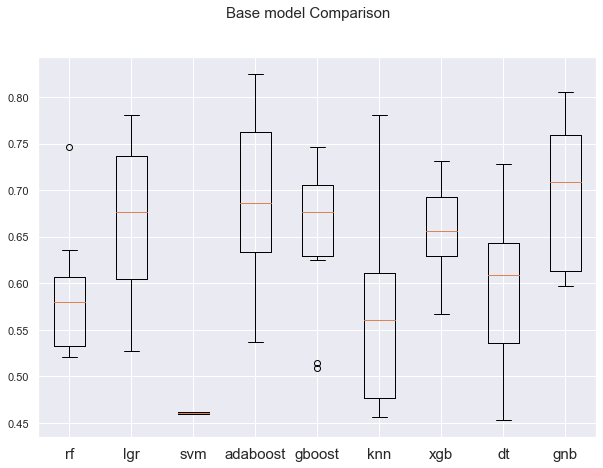

In [47]:
# initializing all base models.
rf = RandomForestClassifier()
svm = SVC()
lgr = LogisticRegression()
adaboost =  AdaBoostClassifier()
gboost = GradientBoostingClassifier()
knn = KNeighborsClassifier()
xgb = xgboost.XGBClassifier(silent = True)
dt = DecisionTreeClassifier()
gnb = GaussianNB()


models = [rf, lgr, svm, adaboost, gboost, knn, xgb, dt, gnb]

scores = []
for model in models:
    
    score = cross_val_score(model, x_train, y_train, cv = k, scoring = 'f1_macro', n_jobs = -1 )
    mean_score = score.mean()
    std_score = score.std()
    
    print('model: {}'.format(model))
    print('CV score:{}'.format(mean_score))
    print('score_std:',std_score)
    print('----------')
    scores.append(score)
    
fig = plt.figure()
fig.suptitle('Base model Comparison', fontsize = 15)
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(['rf', 'lgr','svm', 'adaboost', 'gboost', 'knn', 'xgb','dt','gnb'],
                  fontsize = 15)
fig.set_size_inches(10,7)
plt.show() 

We choose model lgr, adaboost, gboost, xgb and gnb for further tuning, based on their higher mean and median cross-val-score.

### Hyper-parameter tuning

In [48]:
# initializing model parameters.
param_gboost =  dict(
   learning_rate = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
   max_depth = [ 3, 4, 5, 6, 8, 10, 12, 15],
   n_estimators = [100, 150, 200],
   min_samples_split = [1,2,3],
   min_samples_leaf = [1,2], random_state = [41,42,43])

param_xgb  = dict( learning_rate = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
     max_depth = [ 3, 4, 5, 6, 8, 10, 12, 15],
     min_child_weight = [ 1, 3, 5, 7 ],
     gamma = [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     colsample_bytree = [ 0.3, 0.4, 0.5 , 0.7 ], alpha = [0.05,0.1,0.5,0.75,1,1.75,2],
                 reg_lambda = [0.05,0.1,0.5,0.75,1,1.75,2])

param_lgr = dict(penalty = ['l1','l2'],  C = np.logspace(4,-4,60), 
                 solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                 max_iter = [100,150,200,250,300], class_weight = [None,'balanced'], 
                 )

param_adaboost = dict(n_estimators = [50, 100, 150, 200],
                    learning_rate = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
                     algorithm = ['SAMME', 'SAMME.R'],
                      random_state = [41,42,43])

In [49]:
model_param_list = [( gboost,param_gboost), ( xgb,param_xgb), (lgr,param_lgr),
                   (adaboost, param_adaboost)]

In [50]:
%%time
# tuning each model in model_para_list.
best_estimator_list = []
for model, param in model_param_list:
    
    grid = RandomizedSearchCV(model, param, cv = k, n_jobs = -1, scoring = 'f1_macro',
                              random_state = 42)
    grid.fit(x_train, y_train.values.reshape(-1,1))
    best_cvscore = grid.best_score_
    best_param = grid.best_params_
    best_estimator = grid.best_estimator_
    best_estimator_list.append(best_estimator)
    
    print('model:',model)
    print('best_cvscore:',best_cvscore)
    print('best_param:', best_param)
    print('\n')  

print('best_estimators:',best_estimator_list)

model: GradientBoostingClassifier()
best_cvscore: 0.6787863815744901
best_param: {'random_state': 41, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.3}


model: XGBClassifier(silent=True)
best_cvscore: 0.6712829782179226
best_param: {'reg_lambda': 2, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.3, 'gamma': 0.0, 'colsample_bytree': 0.3, 'alpha': 0.5}


model: LogisticRegression()
best_cvscore: 0.6370636269078327
best_param: {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 150, 'class_weight': 'balanced', 'C': 2868.3168133420118}


model: AdaBoostClassifier()
best_cvscore: 0.6579838627624618
best_param: {'random_state': 41, 'n_estimators': 200, 'learning_rate': 0.2, 'algorithm': 'SAMME.R'}


best_estimators: [GradientBoostingClassifier(learning_rate=0.3, random_state=41), XGBClassifier(alpha=0.5, colsample_bytree=0.3, gamma=0.0, learning_rate=0.3,
              reg_lambda=2, silent=True), LogisticRegression(C=2868.31681

In [51]:
best_estimator_list.append(gnb) # appending GaussianNB model for testing.

### Testing

In [52]:
print('*******TRAIN RESULT*******')
print('\n')

for model in best_estimator_list:
    model.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_train)
    score = accuracy_score(y_train, y_pred)
    print('model',model)
    print('accuracy:',round(score*100,2),'%','\n')
    print('auc_roc_score:', round(roc_auc_score(y_train,y_pred)*100,2),'%','\n')
    print('Classification report:','\n', classification_report(y_train, y_pred))
    print('\n')

*******TRAIN RESULT*******


model GradientBoostingClassifier(learning_rate=0.3, random_state=41)
accuracy: 99.91 % 

auc_roc_score: 99.68 % 

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       908
           1       1.00      0.99      1.00       155

    accuracy                           1.00      1063
   macro avg       1.00      1.00      1.00      1063
weighted avg       1.00      1.00      1.00      1063



model XGBClassifier(alpha=0.5, colsample_bytree=0.3, gamma=0.0, learning_rate=0.3,
              reg_lambda=2, silent=True)
accuracy: 98.02 % 

auc_roc_score: 93.23 % 

Classification report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       908
           1       1.00      0.86      0.93       155

    accuracy                           0.98      1063
   macro avg       0.99      0.93      0.96      1063
weighted avg       0.98      0.98    

In [53]:
print('*******TEST RESULT********')
print('\n')

for model in best_estimator_list:
    model.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    
    print('Model:',model,'\n')
    print('accuracy:',round(score*100,2),'%','\n')
    print('confusion_matrix:','\n',confusion_matrix(y_test,y_pred),'\n')
    print('auc_roc_score:', round(roc_auc_score(y_test,y_pred)*100,2),'%','\n')
    print('Classification report:','\n', classification_report(y_test, y_pred))
    print('------------------------------------------------------------------------------')
    print('\n')

*******TEST RESULT********


Model: GradientBoostingClassifier(learning_rate=0.3, random_state=41) 

accuracy: 86.09 % 

confusion_matrix: 
 [[217  10]
 [ 27  12]] 

auc_roc_score: 63.18 % 

Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       227
           1       0.55      0.31      0.39        39

    accuracy                           0.86       266
   macro avg       0.72      0.63      0.66       266
weighted avg       0.84      0.86      0.84       266

------------------------------------------------------------------------------


Model: XGBClassifier(alpha=0.5, colsample_bytree=0.3, gamma=0.0, learning_rate=0.3,
              reg_lambda=2, silent=True) 

accuracy: 88.35 % 

confusion_matrix: 
 [[223   4]
 [ 27  12]] 

auc_roc_score: 64.5 % 

Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.98      0.94       227
           1       0.75   

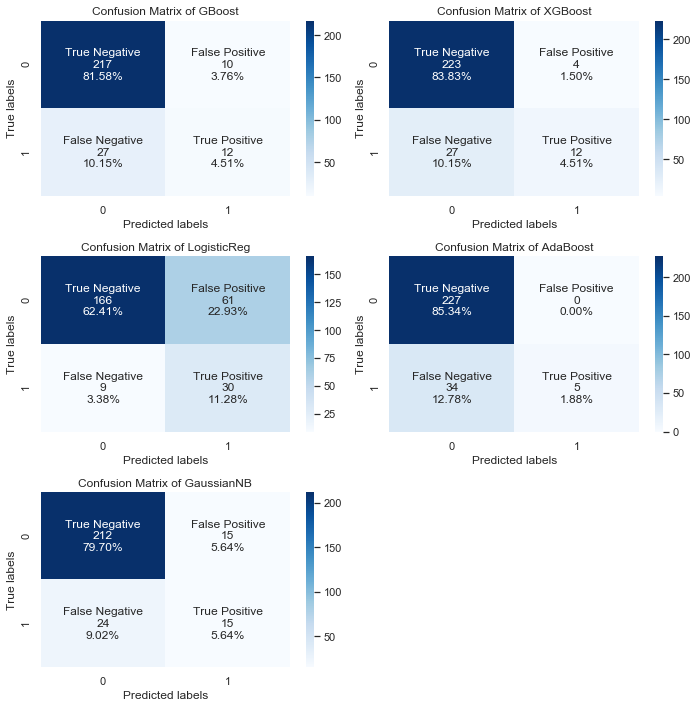

In [55]:
# Visualizing result of confusion matrix through heatmaps.
model_index = [0,1,2,3,4]
model = ['GBoost','XGBoost','LogisticReg','AdaBoost', 'GaussianNB']

for index ,model, model_name in zip(model_index,best_estimator_list,model):
    plt.subplot(3,2, index + 1)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    c_matric = confusion_matrix(y_test, y_pred)
    groups = ['True Negative','False Positive','False Negative','True Positive']
    group_counts = ['{0:0.0f}'.format(value) for value in
                c_matric.flatten()]
    group_percent = ['{0:.2%}'.format(value) for value in
                     c_matric.flatten()/np.sum(c_matric)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(groups,group_counts,group_percent)]
    labels = np.asarray(labels).reshape(2,2)
    sb.heatmap(c_matric, annot=labels, fmt='', cmap='Blues')
    plt.title('Confusion Matrix of ' + model_name)
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(10, 10)
    plt.tight_layout()
plt.show()

From beginning of this project, we suspected the drawbacks of imbalance dataset and its negative impact on model performance in learning the minor class.
Having said that, we still managed to get an accuracy of 88.35 % with XGBoost classifier. But, by realising  our problem statement, i.e. to predict the attrition of employees and prevent it from happening on the first place, and keeping this as our priority, we shall choose the model with the the lowest 'type-II' error, i.e. lowest false nagative  and also highest true positive and thus which gives us the highest roc_auc_score.

Also, other models did better than LogisticRegression in training-set but failed to generalize to the test data.

And, by analysing the above heatmaps, we see the lowest false nagative  and highest true positive of 3.38 % and 11.28 % respectively, corresponds to LogisticRegression model, which therefore has the highest roc_auc_score of 75 %, which implies robust prediction compared to other models interms of predicting the minor class i.e. 'Attrition Yes'. 

Therefore, we choose our classification model as LogisticRegression.

In [671]:
# selecting the best performing model.
selected_model = RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=3,
                       n_estimators=30, random_state=43) 
selected_model.fit(x_train, y_train)
y_pred = selected_model.predict(x_test)

In [674]:
test_df = pd.DataFrame({'Actual Attrition (Yes/No)':y_test.values,
                        'Predicted Attrition (Yes/No)':y_pred})

In [675]:
test_df.to_csv('avocado_region_pred.csv', index = False)
print('Predicted result stored sucessfully.')

Predicted result stored sucessfully.


In [677]:
# Saving the final model as logesticRegression as obj file.
import joblib

joblib.dump(selected_model, 'ibm_hr_attrition_pred.obj')
print('Model successfully saved.')

Model successfully saved.
